### Importing relevant packages 

In [25]:
# Importing the required packages 
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
# Suppress warnings 
# (sometimes you might want to ignore warnings, that's how you can achieve this)
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [6]:
df_drugs = pd.read_csv('drug200.csv')

In [7]:
df_drugs

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [9]:
df_drugs.shape

(200, 6)

In [12]:
df_drugs.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [13]:
df_drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


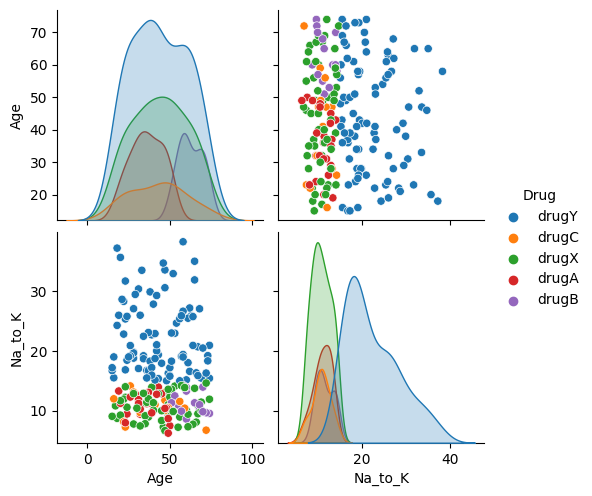

In [19]:
sns.pairplot(data=df_drugs, hue='Drug')

In [23]:
# to check categorical values in the data set 
df_drugs.describe(include='O')

,Sex,BP,Cholesterol,Drug
count,200,200,200,200
unique,2,3,2,5
top,M,HIGH,HIGH,drugY
freq,104,77,103,91


In [24]:
# We have 4 columns categorical columns and we will need to encode them, several ways to do it i.e one hot encoder, or label encoder

In [37]:
#initialize the encoder class
label_enc = LabelEncoder()

In [36]:
cols_to_encode = ['Sex', 'BP', 'Cholesterol', 'Drug']
for col in cols_to_encode:
    df_drugs[col] = label_enc.fit_transform(df_drugs[col])
df_drugs

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [40]:
#Lets seperate teh features and target variable 
X = df_drugs.drop(columns = 'Drug')
Y = df_drugs['Drug']

In [41]:
#Split the data intro train , test split 
X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.3, random_state = 100) 

In [ ]:
#initialize the decision tree 
